In [4]:
# import Pkg; 
# Pkg.activate(joinpath(@__DIR__,"..")); 
# Pkg.instantiate()

using LinearAlgebra
using ForwardDiff
using Plots
plotlyjs()

Plots.PlotlyJSBackend()

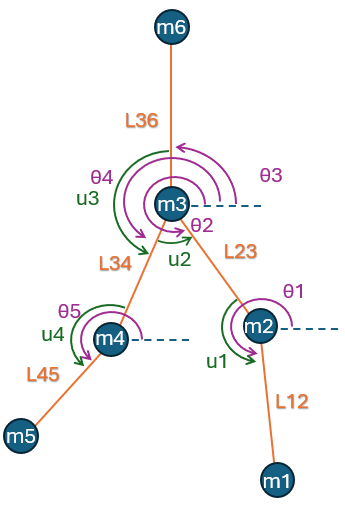

In [14]:
include("DynamicSystems/biped5link.jl") # Defines hybrid system functions

params = ( m1 = 1,  m2 = 1,  m3 = 1,  m4 = 1,  m5 = 1, m6 = 1,
		      l12 = 1, l23 = 1, l34 = 1, l45 = 1, l36 = 1, g = 9.81)


foot1_pos = [0, 0]

θ1 = 280 * (π/180)
θ2 = 300 * (π/180)
θ3 = 90 * (π/180)
θ4 = 250 * (π/180)
θ5 = 220 * (π/180)

x0 = - params.l23 * cos(θ2) - params.l12 * cos(θ1)
y0 = - params.l23 * sin(θ2) - params.l12 * sin(θ1)

q0 = [x0, y0, θ1, θ2, θ3, θ4, θ5]
q̇0 = zeros(7)

A = 10
ω = 2π
# u = _t -> [0, A*sin(ω*_t), 0, 0]
u = _t -> [0,0,0,0]

joints = biped5link_kinematics(q0, params)

fpos = joints[1:2,:]

h = 0.01
tf = 10
T = Int.(tf/h)+1
times = h .* (0:T-1)
q_hist, q̇_hist, λ_hist = simulate(q0, q̇0, u, params, fpos, left_foot_constraint, h, T);

plot()
[plot!(times, q_hist[:,i], label="q$i") for i in 1:7]
display(plot!())

t: 0 
iter: 1    |r|: 0.0   
t: 0.01 
iter: 1    |r|: 0.0   
t: 0.02 
iter: 1    |r|: 0.0   
t: 0.03 
iter: 1    |r|: 0.0   
t: 0.04 
iter: 1    |r|: 0.0   
t: 0.05 
iter: 1    |r|: 0.0   
t: 0.060000000000000005 
iter: 1    |r|: 0.0   
t: 0.07 
iter: 1    |r|: 0.0   
t: 0.08 
iter: 1    |r|: 0.0   
t: 0.09 
iter: 1    |r|: 0.0   
t: 0.09999999999999999 
iter: 1    |r|: 0.0   
t: 0.10999999999999999 
iter: 1    |r|: 0.0   
t: 0.11999999999999998 
iter: 1    |r|: 0.0   
t: 0.12999999999999998 
iter: 1    |r|: 0.0   
t: 0.13999999999999999 
iter: 1    |r|: 0.0   
t: 0.15 
iter: 1    |r|: 0.0   
t: 0.16 
iter: 1    |r|: 0.0   
t: 0.17 
iter: 1    |r|: 0.0   
t: 0.18000000000000002 
iter: 1    |r|: 0.0   
t: 0.19000000000000003 
iter: 1    |r|: 0.0   
t: 0.20000000000000004 
iter: 1    |r|: 0.0   
t: 0.21000000000000005 
iter: 1    |r|: 0.0   
t: 0.22000000000000006 
iter: 1    |r|: 0.0   
t: 0.23000000000000007 
iter: 1    |r|: 0.0   
t: 0.24000000000000007 
iter: 1    |r|: 0.0   
t: 0.25

┌ Info: Saved animation to 
└   fn = "/home/sman/Desktop/Work/Courses/OCRL-Walker-Project/juliaImplementation/juliaImplementation/src/5_link_walker.gif"


Plots.AnimatedGif("/home/sman/Desktop/Work/Courses/OCRL-Walker-Project/juliaImplementation/juliaImplementation/src/5_link_walker.gif")
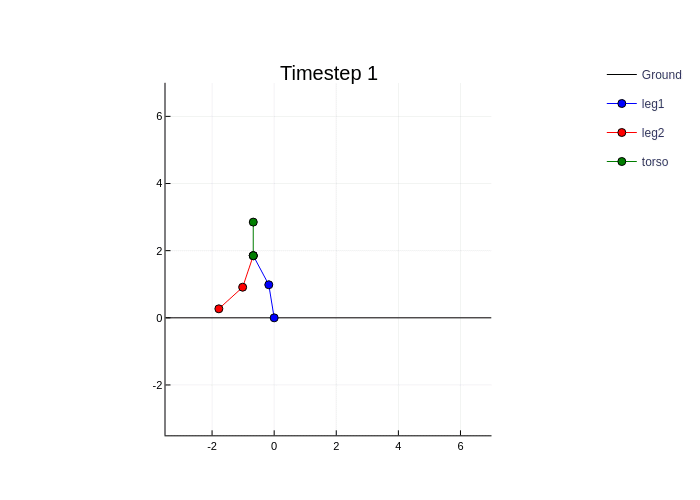

In [15]:
include("DynamicSystems/animate_walker.jl")

animate_walker([q_hist q̇_hist]', params)
